In [1]:
import numpy as np
import os
import tensorflow as tf

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.optimizers import RMSprop

In [21]:
ls

 archive.zip                one-indexed-files-notrash_test.txt
 DATASET/                   one-indexed-files-notrash_train.txt
 data.xls                   one-indexed-files-notrash_val.txt
'garbage classification'/   one-indexed-files.txt
'Garbage classification'/   zero-indexed-files.txt
 gc_modded/


In [22]:
def get_random_crop(in_path, crop_height, crop_width):

  if not os.path.exists(randcrop_path):
          os.mkdir(randcrop_path)
          print("Directory " , randcrop_path ,  " Created ")
  else:    
          print("Directory " , randcrop_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])
      
    max_x = img.shape[1] - crop_width
    max_y = img.shape[0] - crop_height

    x = np.random.randint(0, max_x)
    y = np.random.randint(0, max_y)

    crop = img[y: y + crop_height, x: x + crop_width]
    cv2.imwrite(randcrop_path + "/" + rfiles[i], crop) 

In [31]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  train_path = 'garbage classification/Garbage classification/train/'+i
  randcrop_path = 'gc_modded/train/'+i
  get_random_crop(train_path, 240, 240)

Directory  gc_modded/train/cardboard  Created 
Directory  gc_modded/train/glass  Created 
Directory  gc_modded/train/metal  Created 
Directory  gc_modded/train/paper  Created 
Directory  gc_modded/train/plastic  Created 
Directory  gc_modded/train/trash  Created 


In [27]:
def center_crop(in_path, out_path, dim=(240, 240)):

  if not os.path.exists(out_path):
          os.mkdir(out_path)
          print("Directory " , out_path ,  " Created ")
  else:    
          print("Directory " , out_path ,  " already exists")

  rfiles = [f1 for f1 in os.listdir(in_path) if os.path.isfile(os.path.join(in_path, f1))]

  for i in range(len(rfiles)):
    
    img = cv2.imread(in_path + "/" + rfiles[i])

    width, height = img.shape[1], img.shape[0]
  #process crop width and height for max available dimension
    crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
    crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0]
    mid_x, mid_y = int(width/2), int(height/2)
    cw2, ch2 = int(crop_width/2), int(crop_height/2) 
    crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]

    cv2.imwrite(out_path + "/" + rfiles[i], crop_img) #validation in crop path, test in test_crop

In [32]:
dir = ['cardboard','glass','metal','paper','plastic','trash']
for i in dir:
  val_path = 'garbage classification/Garbage classification/val/'+i
  crop_path = 'gc_modded/val/'+i
  center_crop(val_path, crop_path)

Directory  gc_modded/val/cardboard  Created 
Directory  gc_modded/val/glass  Created 
Directory  gc_modded/val/metal  Created 
Directory  gc_modded/val/paper  Created 
Directory  gc_modded/val/plastic  Created 
Directory  gc_modded/val/trash  Created 


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
train = '/home/amuzak/Datasets/gc_modded/train'
val = '/home/amuzak/Datasets/gc_modded/val'
test = '/home/amuzak/Datasets/gc_modded/test'

In [34]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 16,
                                                      class_mode = 'categorical')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2286 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [35]:
val_generator = ImageDataGenerator(rescale = 1/255)

val_generator = val_generator.flow_from_directory(val,
                                                  target_size = (300,300),
                                                  batch_size = 16,
                                                  class_mode = 'categorical')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 117 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [36]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 16,
                                                    class_mode = 'categorical')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 124 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [37]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [40]:
model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)            

In [39]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [41]:
model.compile(optimizer = SGD(lr=0.01, momentum=0.9, decay=0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [42]:
hist=model.fit(train_generator,
          validation_data=val_generator,
          epochs=60,
          verbose=1)

Epoch 1/60
143/143 [==============================] - 53s 84ms/step - loss: 1.7655 - accuracy: 0.2051 - val_loss: 1.7284 - val_accuracy: 0.2393
Epoch 2/60
143/143 [==============================] - 11s 76ms/step - loss: 1.7452 - accuracy: 0.2099 - val_loss: 1.7138 - val_accuracy: 0.2393
Epoch 3/60
143/143 [==============================] - 11s 77ms/step - loss: 1.7072 - accuracy: 0.2552 - val_loss: 1.7078 - val_accuracy: 0.2393
Epoch 4/60
143/143 [==============================] - 11s 76ms/step - loss: 1.7115 - accuracy: 0.2322 - val_loss: 1.6763 - val_accuracy: 0.2735
Epoch 5/60
143/143 [==============================] - 11s 77ms/step - loss: 1.6664 - accuracy: 0.2802 - val_loss: 1.5708 - val_accuracy: 0.3761
Epoch 6/60
143/143 [==============================] - 11s 76ms/step - loss: 1.6235 - accuracy: 0.3132 - val_loss: 1.5361 - val_accuracy: 0.3932
Epoch 7/60
143/143 [==============================] - 11s 77ms/step - loss: 1.5899 - accuracy: 0.3229 - val_loss: 1.5135 - val_accuracy:

143/143 [==============================] - 12s 82ms/step - loss: 0.9622 - accuracy: 0.6362 - val_loss: 1.2401 - val_accuracy: 0.5726
Epoch 58/60
143/143 [==============================] - 11s 77ms/step - loss: 0.9320 - accuracy: 0.6592 - val_loss: 1.2567 - val_accuracy: 0.5897
Epoch 59/60
143/143 [==============================] - 11s 77ms/step - loss: 0.9350 - accuracy: 0.6448 - val_loss: 1.2366 - val_accuracy: 0.5897
Epoch 60/60
143/143 [==============================] - 11s 77ms/step - loss: 0.9083 - accuracy: 0.6547 - val_loss: 1.2582 - val_accuracy: 0.5726


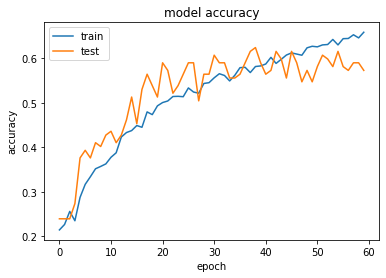

In [43]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model.evaluate(test_generator, verbose=1)

8/8 [==============================] - 0s 36ms/step - loss: 1.3460 - accuracy: 0.5323


[1.345979928970337, 0.5322580933570862]

In [47]:
model.save('../Notebooks/weights/corrected_cropped_model.h5')